<a href="https://colab.research.google.com/github/Peppecoding/Superstore-Dataset-Sales/blob/main/Monthly_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monthly sales analysis

---
Superstore

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

### Datos : [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

## Best practice
Data loading → Import the dataset from a CSV file, a database, or an API.

Initial exploration → Check the dataset’s size, data types, key columns, and potential issues.

Data cleaning → Remove or fill in missing values, eliminate duplicates, fix formatting errors, and convert date columns to datetime format.

Analysis (by time, category, product...) → Group, summarize, and calculate key metrics like total sales, averages, etc.

Visualization → Create clear and professional visualizations (lines, bars, maps, etc.) to communicate insights.

Conclusions → Summarize the findings, identify patterns, and suggest actions based on the data.

#Data loading
→ Import the dataset from a CSV file, a database, or an API.

In [3]:
from google.colab import files
uploaded = files.upload()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Initial exploration

In [12]:
df = pd.read_csv("/content/archive (2).zip", encoding='ISO-8859-1')  # Carga el archivo CSV en un DataFrame
df.head()                                                            # Muestra las primeras 5 filas del dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data cleaning
→ Remove or fill in missing values, eliminate duplicates, and fix formatting errors.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

 Elimina filas con valores nulos directamente en el mismo DataFrame

In [54]:
#  df.dropna(inplace=True)

Check if date has the correct format.

In [55]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [56]:
type(df['Order Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
if df['Order Date'].dtype == 'object':
  df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Analysis (by time, category, product...)

→ Group, summarize, and calculate key metrics like total sales, averages, etc.

In [67]:
# Agrupamos las ventas por mes
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()



# Visualization

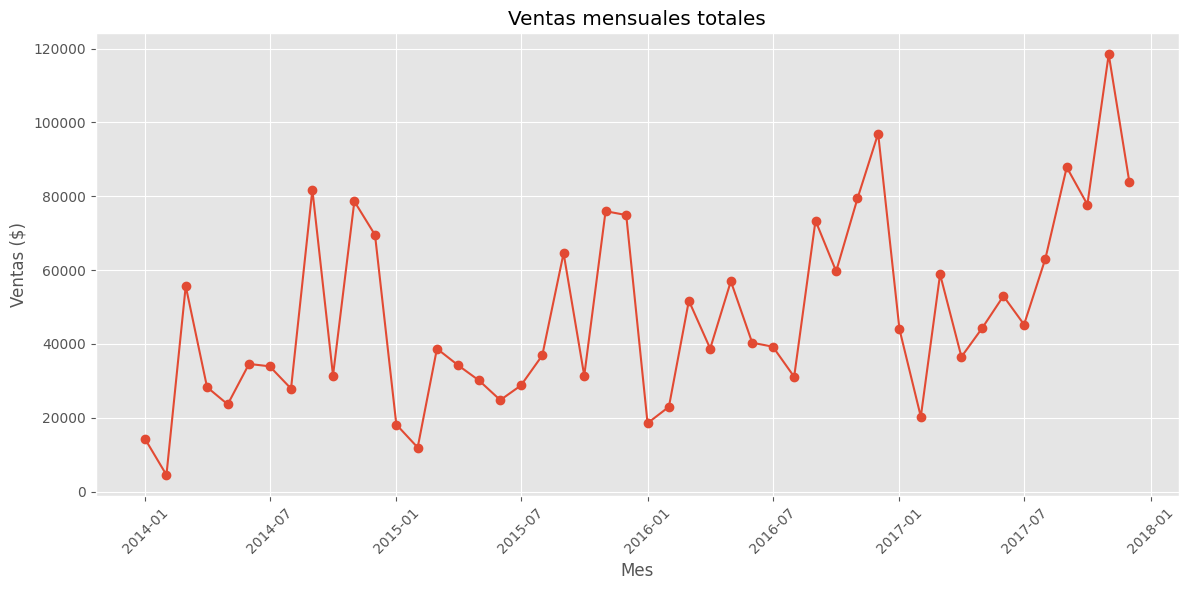

In [68]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Ventas mensuales totales')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusions

- Sales show a clear upward trend over time, with noticeable peaks during the fourth quarter (Q4) of each year.
- This suggests strong seasonality, likely driven by holiday shopping or end-of-year promotions.
- These insights are valuable for planning inventory, marketing campaigns, and staffing during high-demand periods.


❗ What’s missing? or what is next
🔸 Analysis by category or product (deeper insight)
The next logical step would be to identify which categories or products generate the most sales.
